<a href="https://colab.research.google.com/github/cjm112a/forestfire/blob/dev/Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization based on minimizing total travel distance from all pickers.

[(16, 52), (5, 23), (9, 120), (8, 8), (12, 114), (105, 84), (106, 87), (101, 56), (116, 89), (113, 4)]
Iteration:0 Best Solution: [8, 0, 5, 4, 4, 0, 3, 3, 6, 3, 9, 4, 2, 0, 3, 4, 5, 5, 7, 7, 5, 3, 0, 7, 8, 8, 3, 9, 4, 8, 5, 3, 7, 1, 6, 3, 0, 7, 5, 3, 9, 0, 7, 5, 7, 4, 1, 1, 2, 3, 5, 8, 7, 6, 7, 0, 5, 8, 8, 0, 0, 6, 9, 3, 3, 5, 1, 1, 9, 1, 1, 7, 7, 8, 8, 9, 0, 9, 0, 7, 1, 1, 2, 0, 3, 0, 7, 9, 6, 4, 0, 8, 8, 5, 4, 8, 0, 8, 1, 3] 3882
Iteration:1 Best Solution: [7, 2, 6, 7, 3, 3, 2, 3, 8, 1, 4, 2, 9, 4, 1, 6, 8, 3, 1, 1, 0, 8, 1, 8, 1, 2, 4, 8, 8, 5, 4, 4, 3, 5, 8, 0, 4, 6, 3, 4, 2, 8, 7, 8, 2, 8, 3, 4, 6, 7, 8, 2, 1, 7, 4, 6, 5, 7, 0, 1, 6, 5, 7, 9, 4, 0, 5, 6, 1, 9, 9, 2, 2, 4, 4, 7, 6, 3, 0, 8, 6, 6, 9, 3, 2, 5, 3, 0, 4, 1, 6, 3, 2, 8, 9, 2, 2, 9, 9, 3] 3756
Iteration:2 Best Solution: [7, 2, 6, 7, 3, 3, 2, 3, 8, 1, 4, 2, 9, 4, 1, 6, 8, 3, 1, 1, 0, 8, 1, 8, 1, 2, 4, 8, 8, 5, 4, 4, 3, 5, 8, 0, 4, 6, 3, 4, 2, 8, 7, 8, 2, 8, 3, 4, 6, 7, 8, 2, 1, 7, 4, 6, 5, 7, 0, 1, 6, 5, 7, 9, 4, 0, 5, 6,

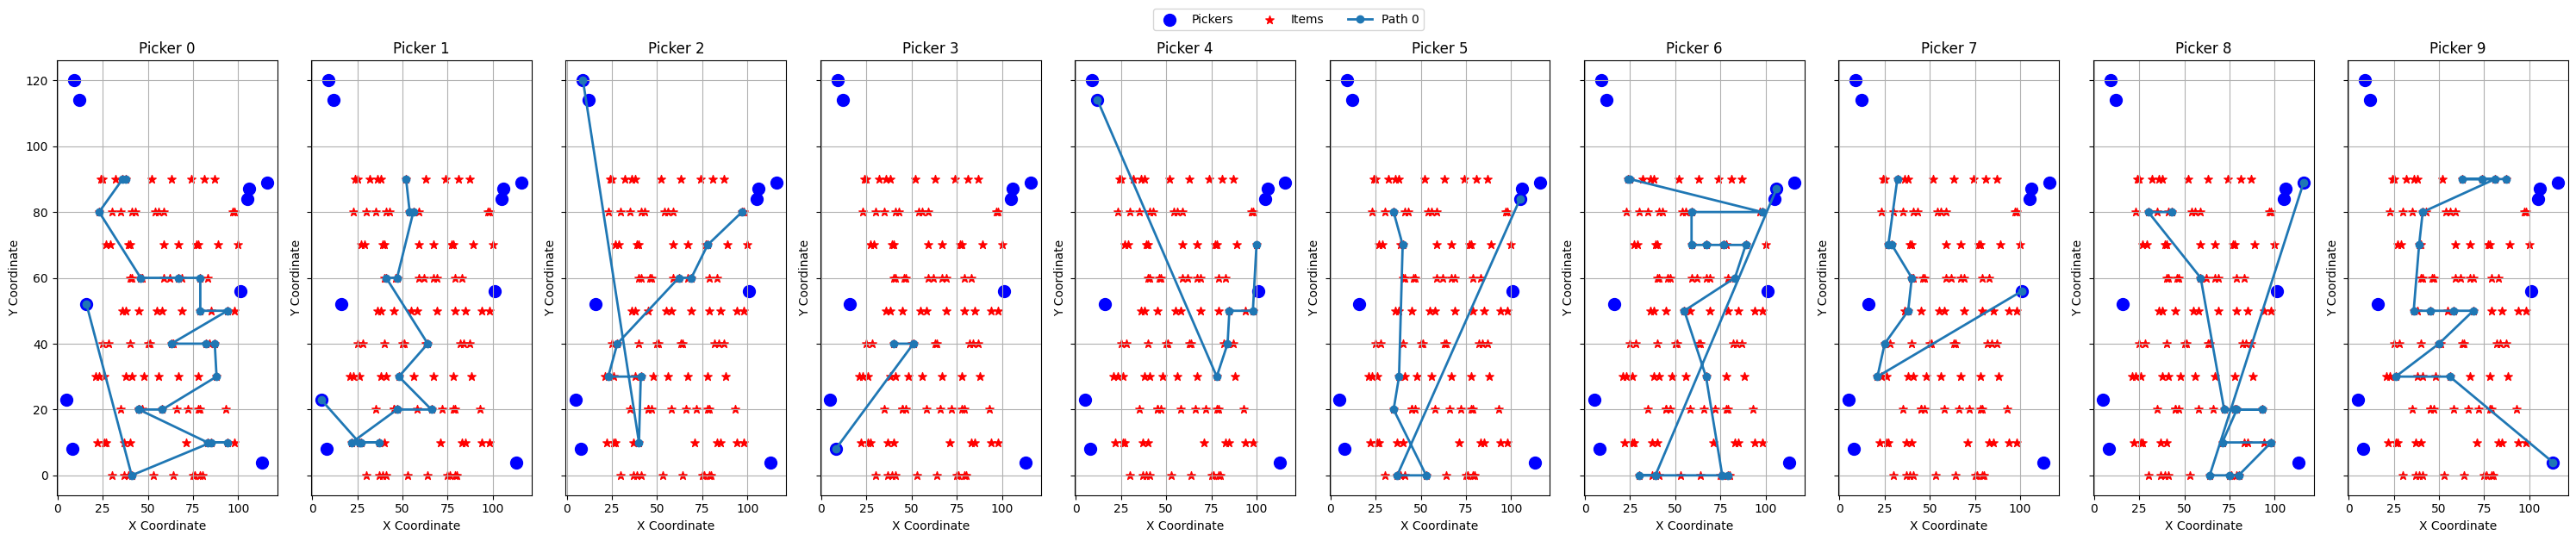

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 100
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10  # How many horizontal lines you want
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)

picker_locations = []
for i in range(num_pickers//2):
    picker_locations.append((random.randint(0,20),random.randint(0,120)))
for i in range(num_pickers//2):
    picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


item_locations = []
for row in selected_rows:
    for i in range(10):
        # Append random column positions (column_start to column_end) for the given row
        item_locations.append((random.randint(20, 100), row))

def calc_distance(picker_locations,item_locations,emptypop_position):
  fitness_score = 0
  distance = 0
  for f in range (num_items):
      distance += abs(picker_locations[emptypop_position[f]][0]-item_locations[f][0])+ \
                  abs(picker_locations[emptypop_position[f]][1]-item_locations[f][1])
      picker_locations[emptypop_position[f]] = item_locations[f]
  fitness_score += distance
  return fitness_score

#fitness calculation
def fitness(distance_matrix,coordinates):
    fitness_score = 0
    for picker_id,item_id in coordinates:
        fitness_score += distance_matrix[picker_id][item_id]
    return fitness_score

def crossover(x1, x2):

    q = random.uniform(0, 1)
    if q <= pc:
        g = random.randint(1, 2)
        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)
    else:
        y1 = x1[:]
        y2 = x2[:]
    return y1, y2
def single_point_crossover(x1, x2):
    n = len(x1)
    crossover_point = random.randint(1, n - 1)
    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2

def uniform_crossover(x1, x2):
    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2

def mutate(x):

    y = x[:]
    j = np.random.randint(len(x))
    y[j] = np.random.randint(10)

    return y

# Intialization

def main():
  empty_pop = []
  for iteration in range(nPop):
    emptypop_position = []
    emptypop_fitness = []
    fitness_score = 0
    distance = 0
    for f in range(num_items):
      emptypop_position.append((random.randint(0,num_pickers-1)))
    fitness_score = calc_distance(picker_locations,item_locations,emptypop_position)
    #value_index_pairs = [(picker_id, item_id) for item_id, picker_id in enumerate(emptypop_position)]
    empty_pop.append([emptypop_position, fitness_score])

  pop = sorted(empty_pop, key=lambda x: x[1])
  best_solution = pop[0]

  #crossover
  for iteration in range(MaxIt):
    crossover_population = []
    for c in range(nc//2):
      parent1 = random.choice(pop)[0]
      parent2 = random.choice(pop)[0]
      offspring1_position,offspring2_position = crossover(parent1,parent2)

      offspring1_fitness = calc_distance(picker_locations,item_locations,offspring1_position)
      offspring2_fitness = calc_distance(picker_locations,item_locations,offspring2_position)

      # #offspring1_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring1_position)])
      # offspring2_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring2_position)])

      crossover_population.append([offspring1_position, offspring1_fitness])
      crossover_population.append([offspring2_position, offspring2_fitness])

    empty_pop.extend(crossover_population)

    #Mutation
    mutation_population = []
    for c in range(nm):
      parent = random.choice(pop)[0]
      offspring_position = mutate(parent)

      offspring_fitness = calc_distance(picker_locations,item_locations,offspring_position)

      #offspring_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring_position)])

      #offspring_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring_position)])

      mutation_population.append([offspring_position, offspring_fitness])

    empty_pop.append([offspring_position, offspring_fitness])

    empty_pop = sorted(empty_pop, key=lambda x: x[1])
    pop = empty_pop[:nPop]
    new_best_solution = sorted(empty_pop, key=lambda x: x[1])[0]
    new_best_fitness = sorted(empty_pop, key=lambda x: x[1])[1]
    print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])
    #print("New Best Fitness:", new_best_solution[1])
  final_solution = new_best_solution[0]
  print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

  orders = {picker_id: [] for picker_id in range(num_pickers)}
  for item_id, picker_id in enumerate(final_solution):
      orders[picker_id].append(item_id)

  print("\nOrders for Each Picker:")
  for picker_id, items in orders.items():
      print(f"Picker {picker_id}: Items {items}")

  route = {picker_id: [] for picker_id in range(num_pickers)}
  for item_id, picker_id in enumerate(final_solution):
      route[picker_id].append(item_locations[item_id])


  fig, axes = plt.subplots(nrows=1, ncols=len(route), figsize=(30, 6), sharex=True, sharey=True)

  picker_x, picker_y = zip(*picker_locations1)
  item_x, item_y = zip(*item_locations)

  for group, ax in enumerate(axes):
      ax.scatter(picker_x, picker_y, c='blue', s=100, label='Pickers', marker='o')

      ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

      points = route[group]
      points.insert(0, picker_locations1[group])
      x, y = zip(*points)
      ax.plot(x, y, marker='o', label=f'Path {group}', linestyle='-', linewidth=2)

      ax.set_title(f"Picker {group}", fontsize=12)
      ax.set_xlabel("X Coordinate", fontsize=10)
      ax.set_ylabel("Y Coordinate", fontsize=10)
      ax.grid(True)

  handles, labels = axes[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

  plt.tight_layout()
  plt.show()

main()

[(11, 37), (13, 87), (3, 67), (11, 74), (6, 112), (116, 102), (117, 118), (112, 93), (109, 92), (111, 108)]
Iteration:0 Best Solution: [6, 2, 4, 1, 4, 2, 5, 3, 5, 5, 9, 4, 0, 3, 0, 5, 7, 6, 3, 4, 4, 2, 4, 6, 5, 5, 7, 0, 7, 6, 4, 6, 5, 8, 0, 6, 5, 0, 4, 5, 4, 2, 8, 3, 4, 7, 4, 2, 4, 0, 5, 7, 5, 2, 8, 6, 3, 2, 7, 5, 7, 1, 4, 2, 4, 9, 0, 3, 2, 0, 0, 3, 8, 1, 8, 2, 6, 1, 6, 1, 5, 1, 0, 5, 1, 3, 5, 0, 7, 1, 5, 5, 4, 7, 4, 4, 0, 0, 4, 0] 2826.0
Iteration:1 Best Solution: [6, 2, 4, 1, 4, 2, 5, 3, 5, 5, 9, 4, 0, 3, 0, 5, 7, 6, 3, 4, 4, 2, 4, 6, 5, 5, 7, 0, 7, 6, 4, 6, 5, 8, 0, 6, 5, 0, 4, 5, 4, 2, 8, 3, 4, 7, 4, 2, 4, 0, 5, 7, 5, 2, 8, 6, 3, 2, 7, 5, 7, 1, 4, 2, 4, 9, 0, 3, 2, 0, 0, 3, 8, 1, 8, 2, 6, 1, 6, 1, 5, 1, 0, 5, 1, 3, 5, 0, 7, 1, 5, 5, 4, 7, 4, 4, 0, 0, 4, 0] 2826.0
Iteration:2 Best Solution: [6, 6, 4, 1, 8, 2, 5, 6, 6, 5, 4, 4, 0, 3, 0, 4, 6, 1, 6, 4, 4, 2, 4, 6, 5, 5, 7, 0, 7, 6, 4, 6, 5, 8, 0, 6, 5, 0, 4, 5, 4, 2, 8, 3, 4, 7, 4, 2, 4, 0, 5, 7, 5, 2, 8, 6, 3, 2, 7, 5, 7, 1, 4, 2, 4,

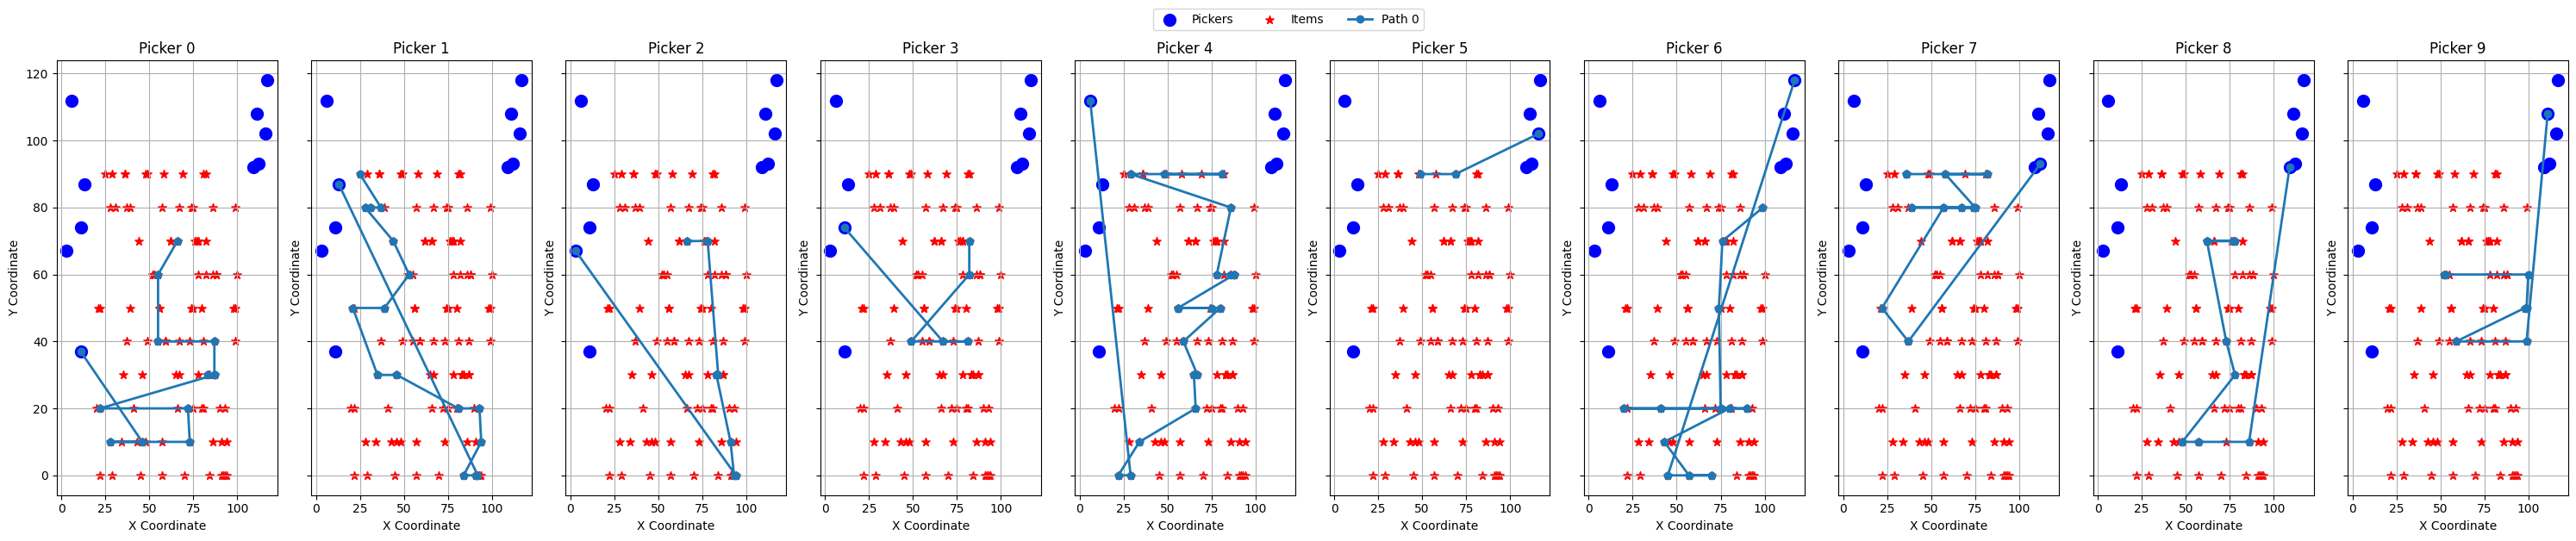

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 100
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10  # How many horizontal lines you want
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)

picker_locations = []
for i in range(num_pickers//2):
    picker_locations.append((random.randint(0,20),random.randint(0,120)))
for i in range(num_pickers//2):
    picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


item_locations = []
for row in selected_rows:
    for i in range(10):
        # Append random column positions (column_start to column_end) for the given row
        item_locations.append((random.randint(20, 100), row))

def calc_distance(picker_locations,item_locations,emptypop_position):
  fitness_score = 0
  distance = 0
  for f in range (num_items):
      distance += abs(picker_locations[emptypop_position[f]][0]-item_locations[f][0])+ \
                  abs(picker_locations[emptypop_position[f]][1]-item_locations[f][1])
      picker_locations[emptypop_position[f]] = item_locations[f]
  fitness_score += distance
  return fitness_score

def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):
    assignments = [[] for _ in range(num_pickers)]
    for item_index, picker_index in enumerate(emptypop_position):
        assignments[picker_index].append(item_index)

    total_fitness_score = 0

    for picker_index, assigned_items in enumerate(assignments):
        if not assigned_items:
            continue
        current_location = picker_locations[picker_index]
        visited = set()
        local_distance = 0

        while len(visited) < len(assigned_items):
            # Get unvisited items' positions
            unvisited_items = [item for item in assigned_items if item not in visited]
            unvisited_locations = [item_locations[item_index] for item_index in unvisited_items]
            unvisited_indices = [item_index for item_index in unvisited_items]

            # Calculate distances to all unvisited items
            distances = cdist([current_location], unvisited_locations, metric='cityblock').flatten()  # Manhattan distance

            # nearest unvisited item
            nearest_index = np.argmin(distances)
            nearest_item = unvisited_indices[nearest_index]
            nearest_location = unvisited_locations[nearest_index]

            local_distance += distances[nearest_index]
            visited.add(nearest_item)

            current_location = nearest_location
        total_fitness_score += local_distance

    return total_fitness_score


#fitness calculation
def fitness(distance_matrix,coordinates):
    fitness_score = 0
    for picker_id,item_id in coordinates:
        fitness_score += distance_matrix[picker_id][item_id]
    return fitness_score


def manhattan_distance(key, value):
    x1, y1 = key
    x2, y2 = value
    return abs(x2 - x1) + abs(y2 - y1)

def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2
def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2

def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []


    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2

def mutate(x):

    y = x[:]

    j = np.random.randint(len(x))

    y[j] = np.random.randint(10)

    return y


# Intialization

def main():
  empty_pop = []
  for iteration in range(nPop):
    emptypop_position = []
    emptypop_fitness = []
    fitness_score = 0
    distance = 0
    for f in range(num_items):
      emptypop_position.append((random.randint(0,num_pickers-1)))
      # tasks = []
      # for item_id, picker_id in enumerate(emptypop_position):
      #     sub_tasks=[]
      #     sub_tasks.append(item_locations[item_id])
      #     tasks.append(sub_tasks)

      # sorted_tasks = {
      #     key: sorted(values, key=lambda value: manhattan_distance(key, value))
      #     for key, values in tasks.items()}
      # print(tasks)

    fitness_score = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)

    # fitness_score = calc_distance(picker_locations,item_locations,emptypop_position)
    empty_pop.append([emptypop_position, fitness_score])


  pop = sorted(empty_pop, key=lambda x: x[1])
  best_solution = pop[0]



  #crossover
  for iteration in range(MaxIt):
    crossover_population = []
    for c in range(nc//2):
      parent1 = random.choice(pop)[0]
      parent2 = random.choice(pop)[0]
      offspring1_position,offspring2_position = crossover(parent1,parent2)

      offspring1_fitness = calc_distance_with_shortest_route(picker_locations,item_locations,offspring1_position)
      offspring2_fitness = calc_distance_with_shortest_route(picker_locations,item_locations,offspring2_position)

      # #offspring1_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring1_position)])
      # offspring2_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring2_position)])

      crossover_population.append([offspring1_position, offspring1_fitness])
      crossover_population.append([offspring2_position, offspring2_fitness])

    empty_pop.extend(crossover_population)

    #Mutation
    mutation_population = []
    for c in range(nm):
      parent = random.choice(pop)[0]
      offspring_position = mutate(parent)

      offspring_fitness = calc_distance_with_shortest_route(picker_locations,item_locations,offspring_position)

      #offspring_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring_position)])

      #offspring_fitness = fitness(distance_matrix,[(picker_id, item_id) for item_id, picker_id in enumerate(offspring_position)])

      mutation_population.append([offspring_position, offspring_fitness])

    empty_pop.append([offspring_position, offspring_fitness])

    empty_pop = sorted(empty_pop, key=lambda x: x[1])
    pop = empty_pop[:nPop]
    new_best_solution = sorted(empty_pop, key=lambda x: x[1])[0]
    new_best_fitness = sorted(empty_pop, key=lambda x: x[1])[1]
    print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])
    #print("New Best Fitness:", new_best_solution[1])
  final_solution = new_best_solution[0]
  print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

  orders = {picker_id: [] for picker_id in range(num_pickers)}
  for item_id, picker_id in enumerate(final_solution):
      orders[picker_id].append(item_id)

  print("\nOrders for Each Picker:")
  for picker_id, items in orders.items():
      print(f"Picker {picker_id}: Items {items}")

  route = {picker_id: [] for picker_id in range(num_pickers)}
  for item_id, picker_id in enumerate(final_solution):
      route[picker_id].append(item_locations[item_id])


  fig, axes = plt.subplots(nrows=1, ncols=len(route), figsize=(30, 6), sharex=True, sharey=True)

  picker_x, picker_y = zip(*picker_locations1)
  item_x, item_y = zip(*item_locations)

  for group, ax in enumerate(axes):
      ax.scatter(picker_x, picker_y, c='blue', s=100, label='Pickers', marker='o')

      ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

      points = route[group]
      points.insert(0, picker_locations1[group])
      x, y = zip(*points)
      ax.plot(x, y, marker='o', label=f'Path {group}', linestyle='-', linewidth=2)

      ax.set_title(f"Picker {group}", fontsize=12)
      ax.set_xlabel("X Coordinate", fontsize=10)
      ax.set_ylabel("Y Coordinate", fontsize=10)
      ax.grid(True)

  handles, labels = axes[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

  plt.tight_layout()
  plt.show()

main()

0: [(39, 50), (80, 40)]
1: [(54, 10)]
2: [(33, 0), (39, 50)]
3: [(23, 90), (32, 40), (32, 40)]
4: [(77, 40)]
5: [(54, 10)]
6: [(80, 40), (88, 0)]
7: [(96, 90), (99, 80), (71, 20), (24, 80)]
8: [(58, 0), (85, 60), (70, 40)]
9: [(54, 10), (57, 80), (43, 20), (43, 70), (54, 10)]
10: [(97, 80), (97, 80), (57, 80)]
11: [(94, 70), (96, 90), (95, 60), (75, 50)]
12: [(57, 90), (79, 70)]
13: [(23, 30), (55, 20)]
14: [(33, 0), (59, 0), (43, 70)]
15: [(70, 40), (96, 70), (51, 50), (80, 40)]
16: [(21, 10), (91, 60), (77, 60), (78, 60)]
17: [(95, 60)]
18: [(56, 10)]
19: [(82, 10), (80, 40), (48, 0), (62, 50), (91, 80)]
20: [(24, 80), (69, 20), (33, 0)]
21: [(33, 20)]
22: [(57, 80), (50, 40)]
23: [(78, 60), (65, 90), (91, 80)]
24: [(39, 50), (54, 10), (33, 60), (79, 70)]
25: [(91, 80)]
26: [(31, 70), (74, 10), (94, 70), (97, 80)]
27: [(33, 20), (67, 50)]
28: [(39, 50), (82, 10), (33, 20)]
29: [(69, 20), (96, 90), (71, 20), (87, 20), (28, 60)]
30: [(59, 0), (96, 90), (80, 40), (74, 10)]
31: [(63, 80)

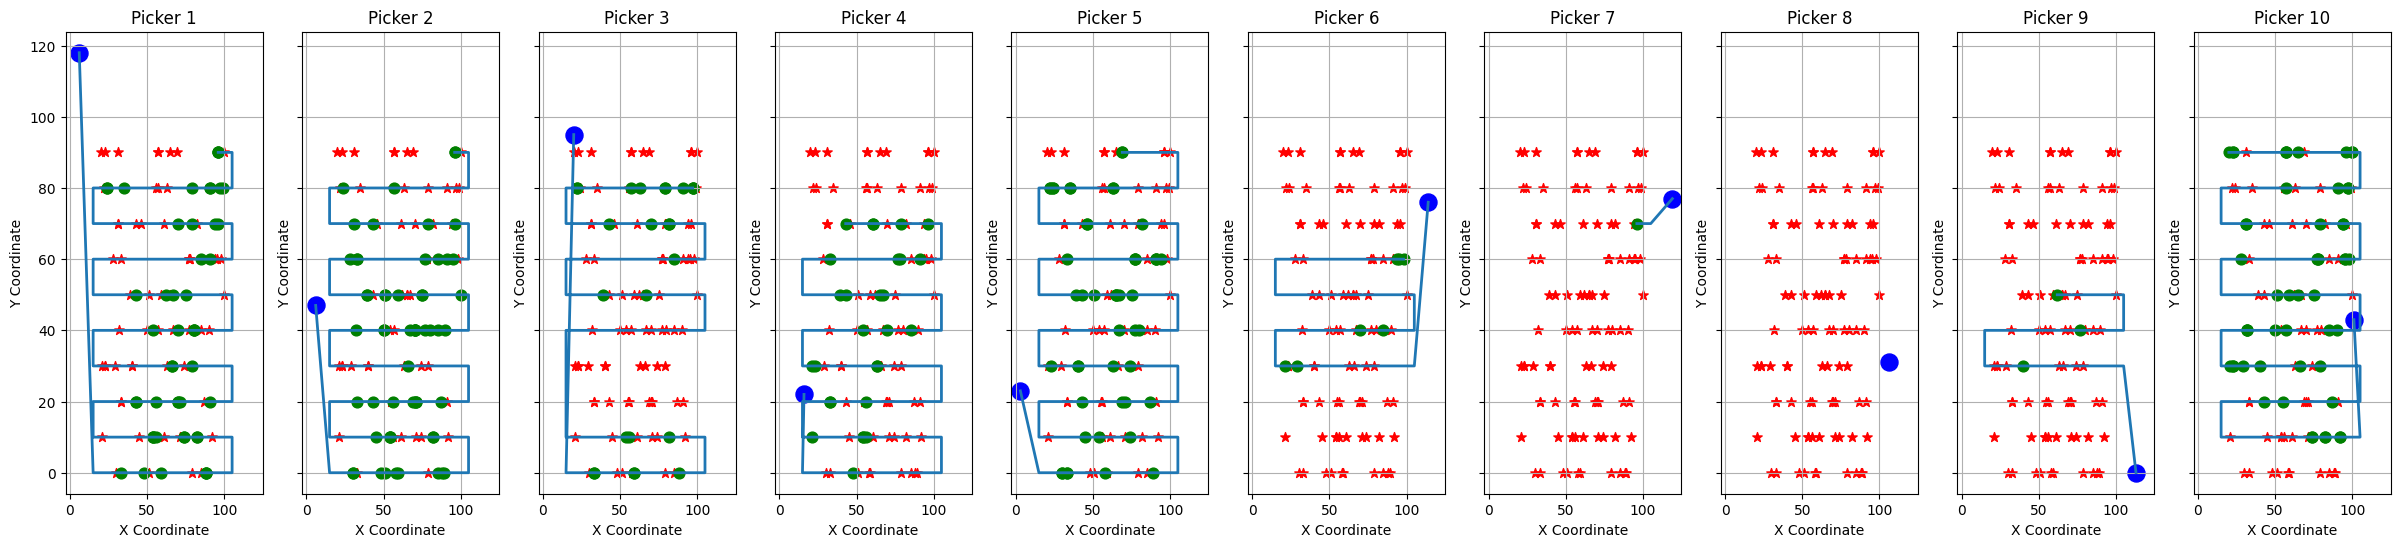

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 500
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
picker_locations = [(6, 118), (6, 47), (20, 95), (16, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
num_orders = 100
orders = {}

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders[i] = selected_items

for order, items in orders.items():
    print(f"{order}: {items}")
# picker_locations = []
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(0,20),random.randint(0,120)))
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


# item_locations = []
# for row in selected_rows:
#     for i in range(10):
#         # Append random column positions (column_start to column_end) for the given row
#         item_locations.append((random.randint(20, 100), row))
print(item_locations)

#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    #print("tournament_contestants",population)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(num_pickers)]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      # sorted_data = []

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)

#both unfavourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1] % 20 != 0 and sorted_data[p][-1][1] % 20 != 0:
                sorted_data[p].insert(0,picker_locations[p])
                sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]-step_between_rows))
                sorted_data[p].insert(2,(right_walkway,sorted_data[p][0][1]-step_between_rows))
                sorted_data[p].insert(3,(right_walkway,sorted_data[p][0][1]))


        else:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
            sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]))
            sorted_data[p].insert(2,(left_walkway,sorted_data[p][0][1]-step_between_rows))
            sorted_data[p].insert(3,(left_walkway,sorted_data[p][0][1]))


#one favourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

#both favourable
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])

      l=[]

      for k in sorted_data:
        if not k:
              l.append([])
              continue
        l1 = k.copy()
        if k[1][1] % 20 != 0:
            l1.insert(1, (right_walkway, k[1][1]))
        else:
            l1.insert(1, (left_walkway, k[1][1]))

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)
      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2
def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2

def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []


    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2

def mutate(x):

    y = x[:]

    j = np.random.randint(len(x))

    y[j] = np.random.randint(10)

    return y

def main():
    empty_pop = []

    # Initial Population
    for iteration in range(nPop-1):
        emptypop_position = []

        for f in range(num_items):
            picker_id = f % num_pickers
            emptypop_position.append(picker_id)
            #emptypop_position.append(random.randint(0, num_pickers-1))
        random.shuffle(emptypop_position)

        # Use `calc_distance_with_shortest_route()` to calculate fitness and get sorted paths
        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        # b=[8, 3, 8, 8, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 8, 7, 3, 3, 7, 7, 7, 3, 3, 3, 7, 7, 3, 9, 3, 3, 9, 3, 9, 3, 9, 3, 3, 9, 9, 9, 3, 3, 3, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 1, 2, 2, 2, 5, 5, 2, 9, 2, 5, 9, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 5, 2, 2, 2]
        # empty_pop.append([b,2325.0822726980086])
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate(parent)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Items {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Params for ACO
alpha = 1.0         # Influence of pheromone trails
beta = 2.0          # Influence of heuristic information
rho = 0.5           # Evaporation rate
Q = 100             # Constant used to update the pheromone
num_ants = 20       # Number of ants
num_iterations = 100

# Problem Definition
rows = 100
cols = 100
num_items = 100
num_pickers = 10
start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

def ant_colony_optimization():
    pheromone = np.ones((num_items, num_pickers))

    heuristic = np.zeros((num_items, num_pickers))

    for item_idx, item_loc in enumerate(item_locations):
        for picker_idx, picker_loc in enumerate(picker_locations):
            distance = math.sqrt((item_loc[0] - picker_loc[0])**2 + (item_loc[1] - picker_loc[1])**2)
            heuristic[item_idx][picker_idx] = 1 / (distance + 1e-6)

    best_solution = None
    best_cost = float('inf')

    for iteration in range(num_iterations):
        solutions = []
        costs = []

        # Each ant constructs a solution
        for ant in range(num_ants):
            # Assign pickers to items
            assignment = []
            for item in range(num_items):
                prob = (pheromone[item] ** alpha) * (heuristic[item] ** beta)
                prob /= prob.sum()  # Normalize probabilities
                picker_choice = np.random.choice(range(num_pickers), p=prob)
                assignment.append(picker_choice)

            # Evaluate the solution
            cost, _, _ = calc_distance_with_shortest_route(picker_locations, item_locations, assignment)
            solutions.append(assignment)
            costs.append(cost)

        # Find the best solution in this iteration
        best_iteration_cost = min(costs)
        best_iteration_solution = solutions[costs.index(best_iteration_cost)]

        if best_iteration_cost < best_cost:
            best_cost = best_iteration_cost
            best_solution = best_iteration_solution

        # Update pheromone trails
        pheromone *= (1 - rho)  # Apply evaporation
        for solution, cost in zip(solutions, costs):
            for item, picker in enumerate(solution):
                pheromone[item][picker] += Q / cost  # Deposit real pheromone inversely proportional to cost

        # Print iteration details
        print(f"Iteration {iteration + 1}: Best Cost = {best_cost}")

    return best_solution, best_cost

def visualize_results(sorted_paths, assignments):
        fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

        picker_x, picker_y = zip(*picker_locations1)
        item_x, item_y = zip(*item_locations)

        for group, ax in enumerate(axes):
            if group >= len(picker_locations1):
                continue

            ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

            ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

            if group < len(sorted_paths):
                points = [picker_locations1[group]] + sorted_paths[group]

                if len(points) > 1:
                    x, y = zip(*points)
                    ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

            if group < len(assignments):
                assignment_points = assignments[group]
            if assignment_points:
                assign_x, assign_y = zip(*assignment_points)
                ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

            ax.set_title(f"Picker {group + 1}", fontsize=12)
            ax.set_xlabel("X Coordinate", fontsize=10)
            ax.set_ylabel("Y Coordinate", fontsize=10)
            ax.grid(True)

def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(num_pickers)]
      for item_index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].append(item_locations[item_index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      # sorted_data = []

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)

#both unfavourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if p<5:
          if sorted_data[p][0][1] % 20 != 0 and sorted_data[p][-1][1] % 20 != 0:
                sorted_data[p].insert(0,picker_locations[p])
                sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]))

        else:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
            sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]))


#one favourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if p<5:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

#both favourable
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if p<5:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])

      l=[]

      for k in sorted_data:
        if not k:
              l.append([])
              continue
        l1 = k.copy()
        if k[1][1] % 20 != 0:
            l1.insert(1, (right_walkway, k[1][1]))
        else:
            l1.insert(1, (left_walkway, k[1][1]))

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)
      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments

best_solution, best_cost = ant_colony_optimization()

print(f"Best Solution: {best_solution}")
print(f"Best Cost: {best_cost}")

_, sorted_paths, assignments = calc_distance_with_shortest_route(picker_locations, item_locations, best_solution)

visualize_results(sorted_paths, assignments)